#PrimeTrade.ai - Intership Assignment

#Data Science Task

**Task Description:**

**Dataset Information:** Historical trade data from various Binance accounts over 90 days, containing:

**Port_IDs:** Unique identifiers for accounts.
**Trade_History:** Historical trades with details like timestamp, asset, side (BUY/SELL), price, and more.


**Objective:** Analyze the dataset to calculate financial metrics for each account, rank them, and provide a top 20 list.


##Step 1: Data Exploration and Cleaning

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ast
import warnings
warnings.filterwarnings("ignore")

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
df=pd.read_csv('/content/drive/MyDrive/PrimeTrade.ai/Copy of TRADES_CopyTr_90D_ROI.csv')

In [117]:
df.head(10)

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."
5,3987739404272887297,"[{'time': 1718979652000, 'symbol': 'ONDOUSDT',..."
6,4030395639953224449,"[{'time': 1718981481000, 'symbol': 'ETHUSDT', ..."
7,3953433416230728705,"[{'time': 1718942316000, 'symbol': 'BTCUSDT', ..."
8,3919174299855478272,"[{'time': 1718853879000, 'symbol': 'ETHUSDT', ..."
9,4029749871687083265,"[{'time': 1718675040000, 'symbol': 'FXSUSDT', ..."


We could see that the file which was saved in CSV format was supposedly in JSON format, before we extract the data from our trade history column, lets do basic data cleaning

In [118]:
df.isna().sum()
df.dropna(inplace=True)


In [119]:
df.duplicated().sum()

0

Lets flatten each trade in the trade history of each portfolio and make a new parsed DataFrame out of it.

In [120]:
trade_data = []

for index, row in df.iterrows():
    port_id = row['Port_IDs']

    try:
        trade_history = ast.literal_eval(row['Trade_History'])  # safely parsing the list of trades
    except ValueError as e:
        print(f"Error parsing Trade_History for Port_ID {port_id}: {e}")
        continue  # skipping this row if there's an error in parsing

    # Flattening each trade in the Trade_History
    for trade in trade_history:
        trade['Port_IDs'] = port_id  # Adding the Port_ID to each trade
        trade_data.append(trade)

# Now converting the list of trade data into a DataFrame
df_parsed = pd.DataFrame(trade_data)

# Checking the structure of the flattened DataFrame
df_parsed.head(10)

,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,Port_IDs
0,1718899656000,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True,3925368433214965504
1,1718899618000,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False,3925368433214965504
2,1718899618000,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False,3925368433214965504
3,1718899616000,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True,3925368433214965504
4,1718899616000,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True,3925368433214965504
5,1718899616000,DOGEUSDT,BUY,0.12182,-0.125718,USDT,251.43648,USDT,0.0,USDT,DOGE,2064.0,LONG,True,3925368433214965504
6,1718899616000,DOGEUSDT,BUY,0.12182,-0.021806,USDT,43.61156,USDT,0.0,USDT,DOGE,358.0,LONG,True,3925368433214965504
7,1718899607000,SOLUSDT,BUY,132.58500,-0.159102,USDT,795.51000,USDT,0.0,USDT,SOL,6.0,LONG,False,3925368433214965504
8,1718899607000,SOLUSDT,BUY,132.58500,-0.596633,USDT,1193.26500,USDT,0.0,USDT,SOL,9.0,LONG,True,3925368433214965504
9,1718889684000,FILUSDT,BUY,4.45400,-0.348525,USDT,697.05100,USDT,0.0,USDT,FIL,156.5,LONG,True,3925368433214965504


###EDA

In [121]:
# Check for missing values in the dataset
missing_values = df_parsed.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for the percentage of missing values for each column
missing_percentage = (df_parsed.isnull().sum() / len(df_parsed)) * 100
print("Missing Values Percentage:\n", missing_percentage)


Missing Values:
 time                   0
symbol                 0
side                   0
price                  0
fee                    0
feeAsset               0
quantity               0
quantityAsset          0
realizedProfit         0
realizedProfitAsset    0
baseAsset              0
qty                    0
positionSide           0
activeBuy              0
Port_IDs               0
dtype: int64
Missing Values Percentage:
 time                   0.0
symbol                 0.0
side                   0.0
price                  0.0
fee                    0.0
feeAsset               0.0
quantity               0.0
quantityAsset          0.0
realizedProfit         0.0
realizedProfitAsset    0.0
baseAsset              0.0
qty                    0.0
positionSide           0.0
activeBuy              0.0
Port_IDs               0.0
dtype: float64


In [122]:
# Check data types and statistics
print(df_parsed.info())
print(df_parsed.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211277 entries, 0 to 211276
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 211277 non-null  int64  
 1   symbol               211277 non-null  object 
 2   side                 211277 non-null  object 
 3   price                211277 non-null  float64
 4   fee                  211277 non-null  float64
 5   feeAsset             211277 non-null  object 
 6   quantity             211277 non-null  float64
 7   quantityAsset        211277 non-null  object 
 8   realizedProfit       211277 non-null  float64
 9   realizedProfitAsset  211277 non-null  object 
 10  baseAsset            211277 non-null  object 
 11  qty                  211277 non-null  float64
 12  positionSide         211277 non-null  object 
 13  activeBuy            211277 non-null  bool   
 14  Port_IDs             211277 non-null  int64  
dtypes: bool(1), float

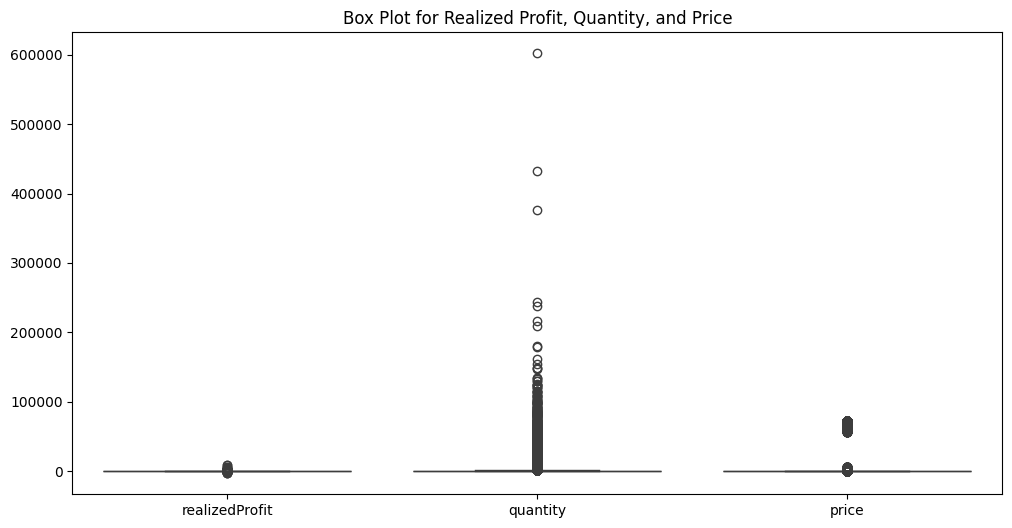

In [123]:
# Box plot for numerical columns (e.g., 'realizedProfit', 'quantity', 'price') to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_parsed[['realizedProfit', 'quantity', 'price']])
plt.title('Box Plot for Realized Profit, Quantity, and Price')
plt.show()


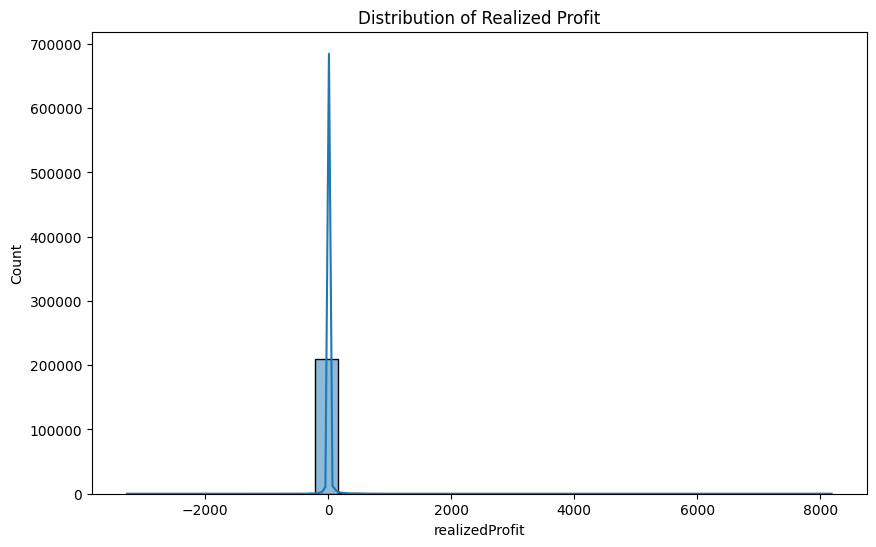

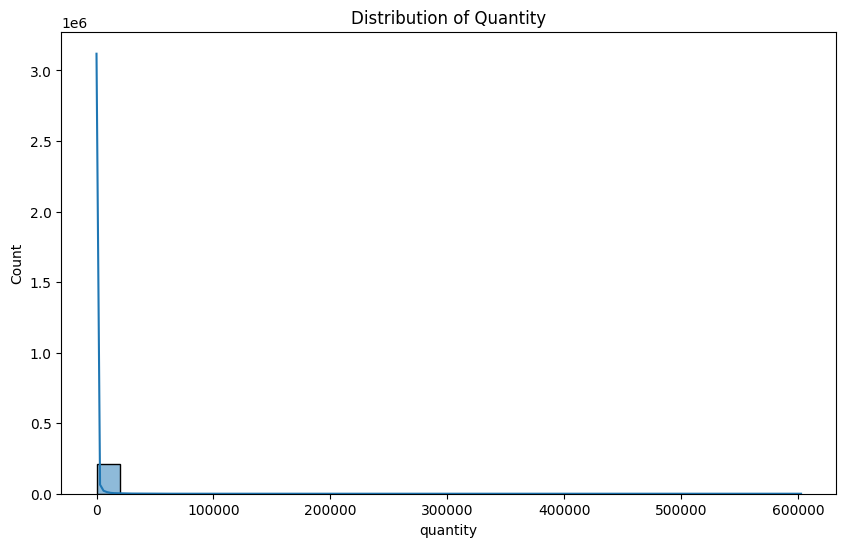

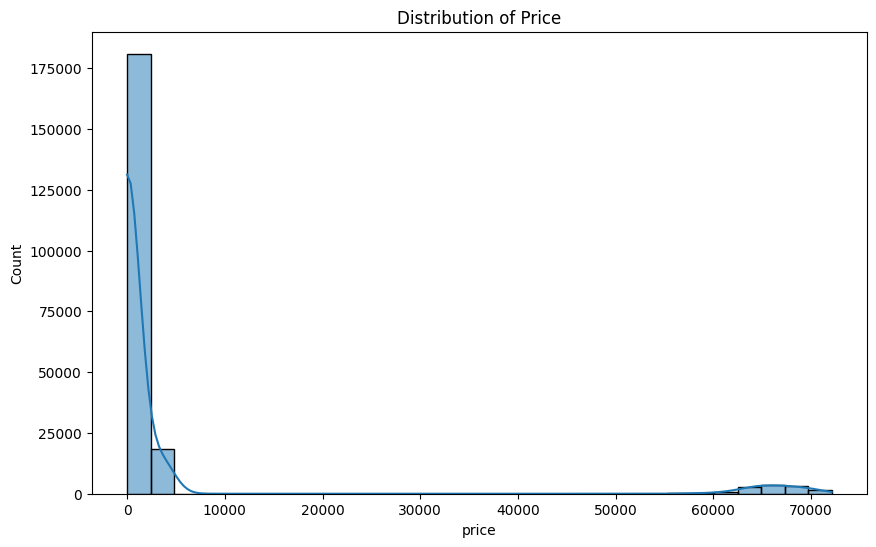

In [124]:

# Visualize the distribution of 'realizedProfit'
plt.figure(figsize=(10, 6))
sns.histplot(df_parsed['realizedProfit'], kde=True, bins=30)
plt.title('Distribution of Realized Profit')
plt.show()

# Visualize the distribution of 'quantity'
plt.figure(figsize=(10, 6))
sns.histplot(df_parsed['quantity'], kde=True, bins=30)
plt.title('Distribution of Quantity')
plt.show()

# Visualize the distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df_parsed['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.show()


##Feature Engineering

In [125]:
# Convert `time` to datetime
df_parsed['time'] = pd.to_datetime(df_parsed['time'], unit='ms')

# Create position type for clarity
df_parsed['position_type'] = df_parsed['side'] + "_" + df_parsed['positionSide']

In [126]:
df_parsed.head()

,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,Port_IDs,position_type
0,2024-06-20 16:07:36,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True,3925368433214965504,BUY_LONG
1,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False,3925368433214965504,BUY_LONG
2,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False,3925368433214965504,BUY_LONG
3,2024-06-20 16:06:56,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True,3925368433214965504,BUY_LONG
4,2024-06-20 16:06:56,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True,3925368433214965504,BUY_LONG


## Metrics

We'll need to create features for each account (i.e., Port_IDs) based on trade history to compute the metrics like ROI, PnL, Sharpe Ratio, etc.


### 1. Return on Investment (ROI)
ROI measures the profitability of each account over the period.

Formula:
ROI = (Total Realized Profit)/(Total Investment) × 100

In [127]:
df_parsed['Return'] = df_parsed['realizedProfit'] / (df_parsed['quantity'] * df_parsed['price'])
ROI_data = df_parsed.groupby('Port_IDs')['Return'].mean().reset_index() #Average ROI for each portfolio
ROI_data.rename(columns={'Return': 'ROI'}, inplace=True)
ROI_data.fillna(0, inplace=True)


In [128]:
ROI_data

,Port_IDs,ROI
0,3672754654734989568,0.018623
1,3733192481840423936,0.000095
2,3768170840939476993,4.974096
3,3784403294629753856,0.091748
4,3786761687746711808,0.001372
...,...,...
144,4039279455324236544,0.377743
145,4040382575336130560,0.000000
146,4040843843196854529,0.000002
147,4041804592937345281,-0.000515


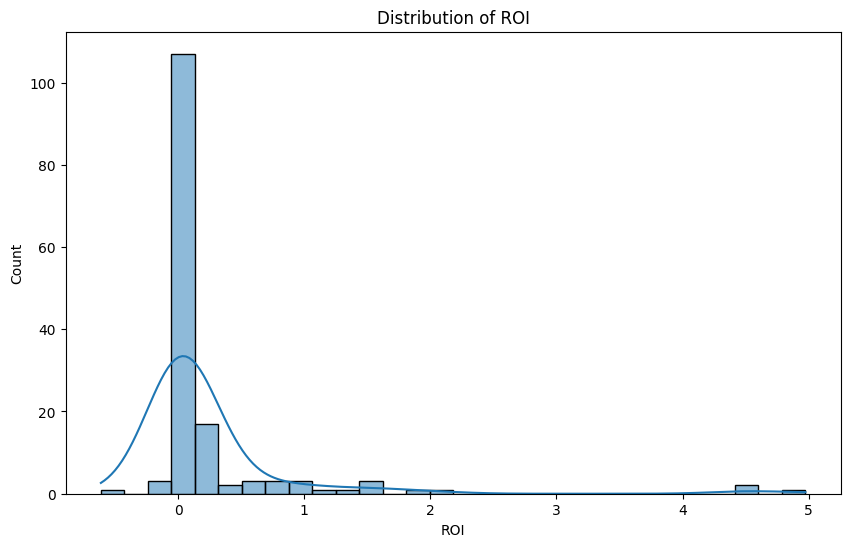

In [129]:
# Visualize the distribution of ROI
plt.figure(figsize=(10, 6))
sns.histplot(ROI_data['ROI'], kde=True, bins=30)
plt.title('Distribution of ROI')
plt.show()

###2. Profit and Loss (PnL)


In [130]:
# Sum of realized profit for each account
pnl_data = df_parsed.groupby('Port_IDs')['realizedProfit'].sum().reset_index(name='PnL')
pnl_data.rename(columns={'realizedProfit': 'Total_Profit'}, inplace=True)
pnl_data.fillna(0, inplace=True)
pnl_data

,Port_IDs,PnL
0,3672754654734989568,566.597660
1,3733192481840423936,2923.977200
2,3768170840939476993,243.668899
3,3784403294629753856,2521.814305
4,3786761687746711808,205.021400
...,...,...
144,4039279455324236544,1038.807419
145,4040382575336130560,0.000000
146,4040843843196854529,2151.704060
147,4041804592937345281,-776.343000


###3. Sharpe Ratio
The Sharpe Ratio measures risk-adjusted return.

Formula:
Sharpe Ratio = (Mean Daily Return)/(Standard Deviation of Daily Return) × sqrt(252)

Daily Return: The percentage change in profit for each day.
Annualizing Factor: sqrt(252) (assuming 252 trading days in a year).

Sharpe ratio > 1: Good risk-adjusted return.

Sharpe ratio < 0: Poor risk-adjusted return.


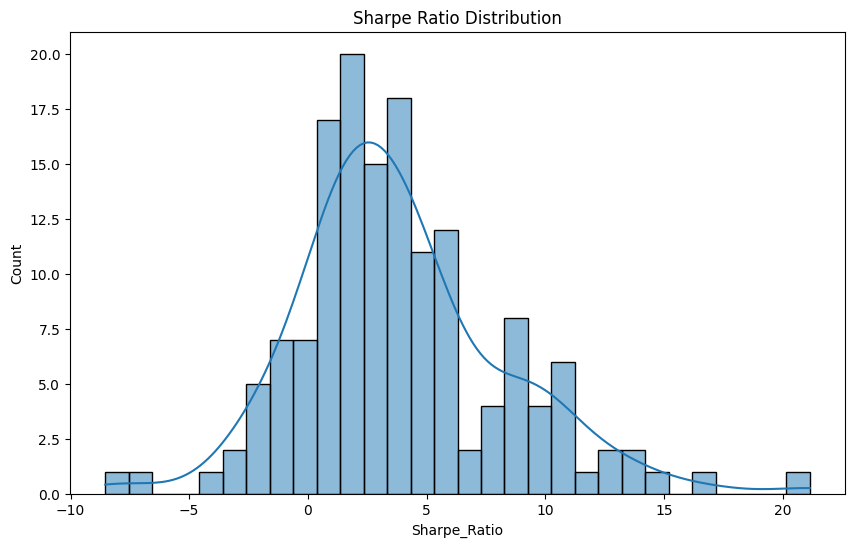

In [131]:
# Calculate Sharpe Ratio for each portfolio
sharpe_ratio_data = df_parsed.groupby('Port_IDs').apply(
    lambda x: (x['Return'].mean() / x['Return'].std()) * (252**0.5)  # Annualized Sharpe Ratio assuming 252 trading days
).reset_index(name='Sharpe_Ratio')

sharpe_ratio_data.fillna(0, inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(sharpe_ratio_data['Sharpe_Ratio'], kde=True, bins=30)
plt.title('Sharpe Ratio Distribution')
plt.show()

###4. Maximum Drawdown (MDD)
Maximum Drawdown is the largest peak-to-trough loss in portfolio value during a specific period.

To calculate MDD, we need to track the cumulative return and identify the largest drop in value from the peak to the trough.

Steps to calculate MDD:

1. Calculate the cumulative returns for each portfolio.
2. Identify the peak and the subsequent trough.
3. Calculate the drawdown as the percentage drop from peak to trough.

A large drawdown indicates risk, which can be critical for assessing the stability of portfolios.



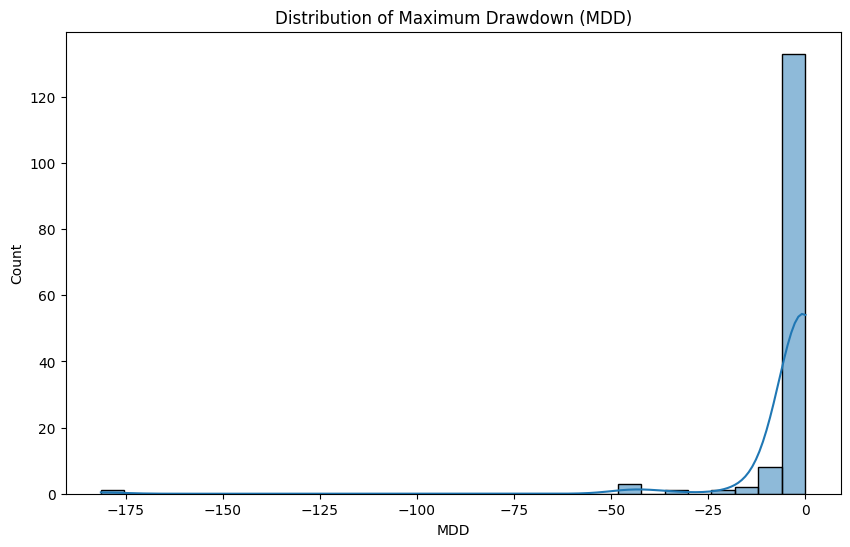

In [132]:
def calculate_mdd(portfolio):
    # Calculate cumulative profit
    portfolio['Cumulative_Profit'] = portfolio['realizedProfit'].cumsum()

    # Calculate maximum cumulative profit up to that point
    portfolio['Max_Cumulative_Profit'] = portfolio['Cumulative_Profit'].cummax()

    # Calculate drawdown (peak-to-trough drop)
    portfolio['Drawdown'] = (portfolio['Cumulative_Profit'] - portfolio['Max_Cumulative_Profit']) / portfolio['Max_Cumulative_Profit']

    # Replace infinity values in drawdown with zero
    portfolio['Drawdown'] = portfolio['Drawdown'].replace([np.inf, -np.inf], 0)

    # Return the minimum drawdown value (largest peak-to-trough drawdown)
    return portfolio['Drawdown'].min()

# Group by portfolio and calculate MDD
mdd_data = df_parsed.groupby('Port_IDs').apply(calculate_mdd).reset_index()
mdd_data.columns = ['Port_IDs', 'MDD']

mdd_data.fillna(0, inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(mdd_data['MDD'], kde=True, bins=30)
plt.title('Distribution of Maximum Drawdown (MDD)')
plt.show()

###5. Win Rate and Win Positions
Win Rate is the percentage of profitable trades relative to the total number of trades. A trade is considered profitable if realizedProfit > 0. Win rate helps assess the consistency of profitable trades across portfolios.

Win Positions is simply the number of trades with positive realizedProfit for each portfolio. Shows how many winning positions each portfolio has had.

Total Positions is the total number of trades for each portfolio. Total positions can be visualized to see how actively portfolios are trading.


In [133]:
# Calculate win rate
win_rate_data = df_parsed.groupby('Port_IDs').apply(
    lambda x: (x['realizedProfit'] > 0).mean()
).reset_index(name='Win_Rate')
win_rate_data.fillna(0, inplace=True)

# Calculate the number of win positions
win_positions_data = df_parsed.groupby('Port_IDs').apply(
    lambda x: (x['realizedProfit'] > 0).sum()
).reset_index(name='Win_Positions')
win_positions_data.fillna(0, inplace=True)

# Calculate total positions
total_positions_data = df_parsed.groupby('Port_IDs')['realizedProfit'].count().reset_index(name='Total_Positions')
total_positions_data.fillna(0, inplace=True)


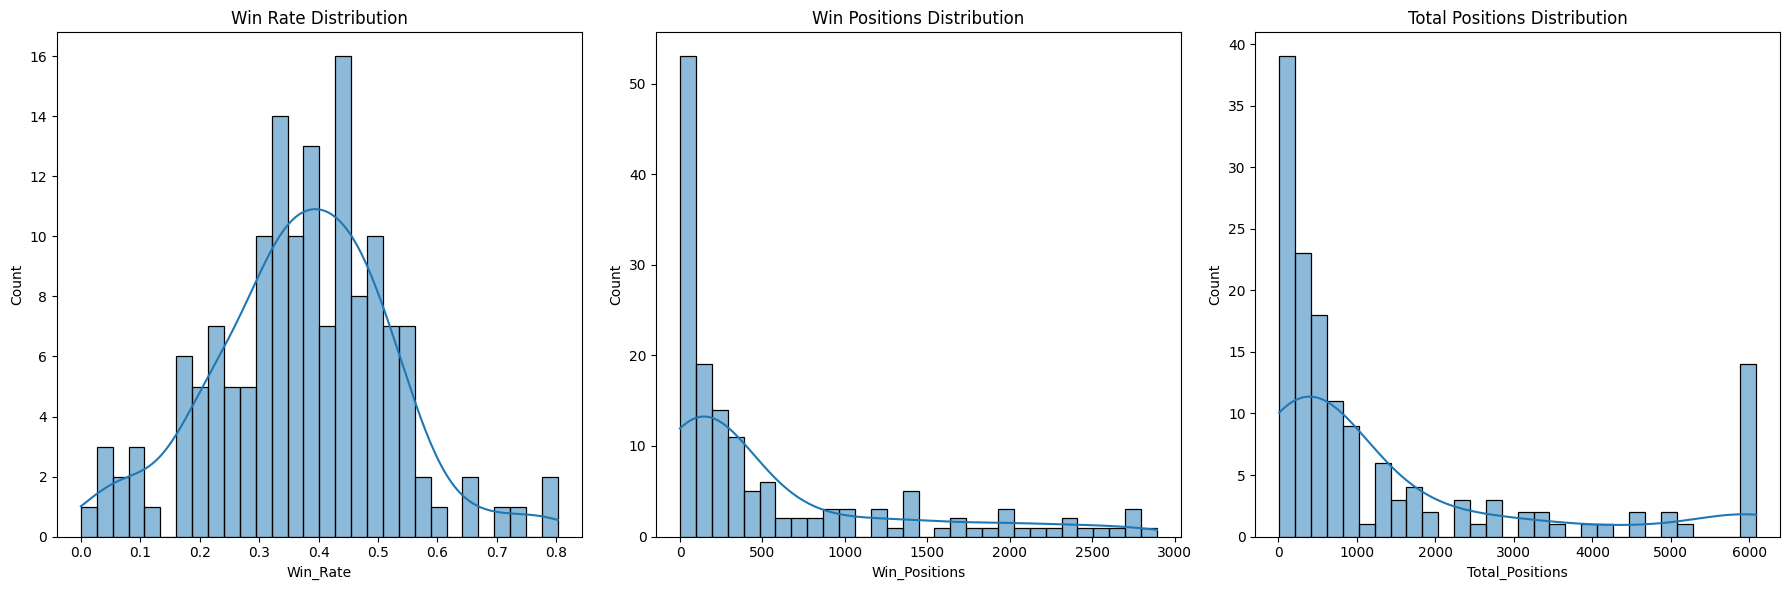

In [134]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Win Rate Distribution
sns.histplot(win_rate_data['Win_Rate'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Win Rate Distribution')

# Plot Win Positions Distribution
sns.histplot(win_positions_data['Win_Positions'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Win Positions Distribution')

# Plot Total Positions Distribution
sns.histplot(total_positions_data['Total_Positions'], kde=True, bins=30, ax=axes[2])
axes[2].set_title('Total Positions Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

##Step 3: Ranking Algorithm
Combine all the calculated metrics into a single DataFrame, assign weights to each metric, and compute a final score.

In [135]:
# Merging all the calculated metrics into a single DataFrame
metrics_df = pd.merge(ROI_data, sharpe_ratio_data, on='Port_IDs', how='left')
metrics_df = pd.merge(metrics_df, pnl_data, on='Port_IDs', how='left')
metrics_df = pd.merge(metrics_df, mdd_data, on='Port_IDs', how='left')
metrics_df = pd.merge(metrics_df, win_rate_data, on='Port_IDs', how='left')
metrics_df = pd.merge(metrics_df, win_positions_data, on='Port_IDs', how='left')
metrics_df = pd.merge(metrics_df, total_positions_data, on='Port_IDs', how='left')

# Saving the final DataFrame to a CSV file for backup/reference
metrics_df.to_csv('portfolio_metrics.csv', index=False)

metrics_df.head()

,Port_IDs,ROI,Sharpe_Ratio,PnL,MDD,Win_Rate,Win_Positions,Total_Positions
0,3672754654734989568,0.018623,0.104393,566.597660,-0.460781,0.443038,210,474
1,3733192481840423936,0.000095,21.145316,2923.977200,-0.760355,0.802612,553,689
2,3768170840939476993,4.974096,13.247485,243.668899,0.000000,0.428571,6,14
3,3784403294629753856,0.091748,0.821980,2521.814305,-0.177261,0.302314,1829,6050
4,3786761687746711808,0.001372,4.032232,205.021400,-2.318212,0.451220,37,82


In [136]:
from sklearn.preprocessing import MinMaxScaler

# Inverting MDD since lower values are better
metrics_df['Normalized_MDD'] = -metrics_df['MDD']

# Selecting features to scale
features = ['ROI', 'PnL', 'Sharpe_Ratio', 'Normalized_MDD', 'Win_Rate', 'Win_Positions', 'Total_Positions']
scaler = MinMaxScaler()

# Applying MinMax scaling to the features for normalization
metrics_df[features] = scaler.fit_transform(metrics_df[features])

# Displaying normalized values for verification
metrics_df[features].head()


,ROI,PnL,Sharpe_Ratio,Normalized_MDD,Win_Rate,Win_Positions,Total_Positions
0,0.112949,0.153100,0.291103,0.002540,0.551995,0.072589,0.075770
1,0.109632,0.181049,1.000000,0.004192,1.000000,0.191151,0.111184
2,1.000000,0.149271,0.733911,0.000000,0.533971,0.002074,0.000000
3,0.126039,0.176281,0.315279,0.000977,0.376663,0.632216,0.994235
4,0.109861,0.148813,0.423437,0.012781,0.562189,0.012789,0.011201


In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Defining features and target for Profitability Ranking
X_profit = metrics_df[['ROI', 'PnL', 'Sharpe_Ratio', 'MDD', 'Win_Rate', 'Win_Positions', 'Total_Positions']]
y_profit = metrics_df['PnL']  # Target based on profitability

# Scaling the features
scaler = StandardScaler()
X_profit_scaled = scaler.fit_transform(X_profit)

# Training Random Forest model
rf_profit = RandomForestRegressor(random_state=42)
rf_profit.fit(X_profit_scaled, y_profit)

# Extracting feature importance for Profitability Ranking
profit_importances = rf_profit.feature_importances_
profit_weights_df = pd.DataFrame({
    'Metric': X_profit.columns,
    'Profitability_Importance': profit_importances
}).sort_values(by='Profitability_Importance', ascending=False)


In [138]:
# Defining features and target for Risk-Adjusted Ranking
X_risk = metrics_df[['ROI', 'PnL', 'Sharpe_Ratio', 'MDD', 'Win_Rate', 'Win_Positions', 'Total_Positions']]
y_risk = metrics_df['Sharpe_Ratio']  # Target based on risk-adjusted performance

# Training Random Forest model
rf_risk = RandomForestRegressor(random_state=42)
rf_risk.fit(X_risk, y_risk)

# Extracting feature importance for Risk-Adjusted Ranking
risk_importances = rf_risk.feature_importances_
risk_weights_df = pd.DataFrame({
    'Metric': X_risk.columns,
    'Risk_Adjusted_Importance': risk_importances
}).sort_values(by='Risk_Adjusted_Importance', ascending=False)


In [139]:
# Defining features and target for Trade Success Ranking
X_trade = metrics_df[['ROI', 'PnL', 'Sharpe_Ratio', 'MDD', 'Win_Rate', 'Win_Positions', 'Total_Positions']]
y_trade = metrics_df['Win_Rate']  # Target based on trade success

# Training Random Forest model
rf_trade = RandomForestRegressor(random_state=42)
rf_trade.fit(X_trade, y_trade)

# Extracting feature importance for Trade Success Ranking
trade_importances = rf_trade.feature_importances_
trade_weights_df = pd.DataFrame({
    'Metric': X_trade.columns,
    'Trade_Success_Importance': trade_importances
}).sort_values(by='Trade_Success_Importance', ascending=False)


In [140]:
# Normalize and add weights for each ranking type
profit_weights_df['Profitability_Weight'] = profit_weights_df['Profitability_Importance'] / profit_weights_df['Profitability_Importance'].sum()
risk_weights_df['Risk_Adjusted_Weight'] = risk_weights_df['Risk_Adjusted_Importance'] / risk_weights_df['Risk_Adjusted_Importance'].sum()
trade_weights_df['Trade_Success_Weight'] = trade_weights_df['Trade_Success_Importance'] / trade_weights_df['Trade_Success_Importance'].sum()

# Merging weights into a single DataFrame
combined_weights_df = profit_weights_df[['Metric', 'Profitability_Weight']].merge(
    risk_weights_df[['Metric', 'Risk_Adjusted_Weight']], on='Metric').merge(
    trade_weights_df[['Metric', 'Trade_Success_Weight']], on='Metric')


In [141]:
# Load necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# Define features for each ranking type
profitability_features = ['ROI', 'PnL']
risk_adjusted_features = ['Sharpe_Ratio', 'MDD']
trade_success_features = ['Win_Rate', 'Win_Positions']

# Scale features for fair comparison
scaler = MinMaxScaler()
metrics_df[profitability_features + risk_adjusted_features + trade_success_features] = scaler.fit_transform(
    metrics_df[profitability_features + risk_adjusted_features + trade_success_features]
)

# Function to calculate feature importances
def calculate_feature_weights(features, target, data):
    X = data[features]
    y = data[target]
    model = RandomForestRegressor()
    model.fit(X, y)
    feature_importance = model.feature_importances_
    weights = feature_importance / feature_importance.sum()  # Normalize to sum to 1
    return dict(zip(features, weights))

# Generate weights for each ranking based on feature importance
profitability_weights = calculate_feature_weights(profitability_features, 'ROI', metrics_df)
risk_adjusted_weights = calculate_feature_weights(risk_adjusted_features, 'Sharpe_Ratio', metrics_df)
trade_success_weights = calculate_feature_weights(trade_success_features, 'Win_Rate', metrics_df)

# Compute scores for each ranking
metrics_df['Profitability_Score'] = sum(
    metrics_df[feature] * weight for feature, weight in profitability_weights.items()
)
metrics_df['Risk_Adjusted_Score'] = sum(
    metrics_df[feature] * weight for feature, weight in risk_adjusted_weights.items()
)
metrics_df['Trade_Success_Score'] = sum(
    metrics_df[feature] * weight for feature, weight in trade_success_weights.items()
)

# Overall ranking as a combination of the three individual scores
metrics_df['Overall_Composite_Score'] = (
    metrics_df['Profitability_Score'] * 0.4 +
    metrics_df['Risk_Adjusted_Score'] * 0.3 +
    metrics_df['Trade_Success_Score'] * 0.3
)

# Rank each portfolio based on the computed scores
metrics_df['Profitability_Rank'] = metrics_df['Profitability_Score'].rank(ascending=False)
metrics_df['Risk_Adjusted_Rank'] = metrics_df['Risk_Adjusted_Score'].rank(ascending=False)
metrics_df['Trade_Success_Rank'] = metrics_df['Trade_Success_Score'].rank(ascending=False)
metrics_df['Overall_Rank'] = metrics_df['Overall_Composite_Score'].rank(ascending=False)

# Display final rankings
metrics_df[['Port_IDs', 'Profitability_Rank', 'Risk_Adjusted_Rank', 'Trade_Success_Rank', 'Overall_Rank']]


,Port_IDs,Profitability_Rank,Risk_Adjusted_Rank,Trade_Success_Rank,Overall_Rank
0,3672754654734989568,75.0,127.0,48.0,91.0
1,3733192481840423936,115.0,1.0,1.0,2.0
2,3768170840939476993,1.0,5.0,58.0,1.0
3,3784403294629753856,45.0,122.0,106.0,114.0
4,3786761687746711808,131.0,61.0,44.0,61.0
...,...,...,...,...,...
144,4039279455324236544,21.0,6.0,12.0,8.0
145,4040382575336130560,134.0,128.0,149.0,148.0
146,4040843843196854529,124.0,11.0,102.0,43.0
147,4041804592937345281,138.0,149.0,125.0,149.0


In [142]:
# Assuming `metrics_df` contains the original metrics and we have calculated rankings

# Merge rankings into the metrics dataframe
metrics_df['Profitability_Rank'] = metrics_df['Profitability_Score'].rank(ascending=False)
metrics_df['Risk_Adjusted_Rank'] = metrics_df['Risk_Adjusted_Score'].rank(ascending=False)
metrics_df['Trade_Success_Rank'] = metrics_df['Trade_Success_Score'].rank(ascending=False)
metrics_df['Overall_Rank'] = metrics_df['Overall_Composite_Score'].rank(ascending=False)

# Now the metrics_df contains both the metrics and their corresponding ranks
# You can review and save the merged dataframe
metrics_df.to_csv('portfolio_metrics_with_rankings.csv', index=False)

# Display the merged dataframe for review
metrics_df[['Port_IDs', 'ROI', 'PnL', 'Sharpe_Ratio', 'MDD', 'Win_Rate', 'Win_Positions', 'Total_Positions',
            'Profitability_Score', 'Risk_Adjusted_Score', 'Trade_Success_Score', 'Overall_Composite_Score',
            'Profitability_Rank', 'Risk_Adjusted_Rank', 'Trade_Success_Rank', 'Overall_Rank']].head()


,Port_IDs,ROI,PnL,Sharpe_Ratio,MDD,Win_Rate,Win_Positions,Total_Positions,Profitability_Score,Risk_Adjusted_Score,Trade_Success_Score,Overall_Composite_Score,Profitability_Rank,Risk_Adjusted_Rank,Trade_Success_Rank,Overall_Rank
0,3672754654734989568,0.112949,0.153100,0.291103,0.997460,0.551995,0.072589,0.075770,0.113880,0.295102,0.544089,0.297309,75.0,127.0,48.0,91.0
1,3733192481840423936,0.109632,0.181049,1.000000,0.995808,1.000000,0.191151,0.111184,0.111288,0.999976,0.986661,0.640507,115.0,1.0,1.0,2.0
2,3768170840939476993,1.000000,0.149271,0.733911,1.000000,0.533971,0.002074,0.000000,0.980274,0.735418,0.525199,0.770295,1.0,5.0,58.0,1.0
3,3784403294629753856,0.126039,0.176281,0.315279,0.999023,0.376663,0.632216,0.994235,0.127204,0.319151,0.380877,0.260890,45.0,122.0,106.0,114.0
4,3786761687746711808,0.109861,0.148813,0.423437,0.987219,0.562189,0.012789,0.011201,0.110764,0.426629,0.553128,0.338233,131.0,61.0,44.0,61.0


##Step 4: Generate the Top 20 Accounts and Save the Results
Rank the accounts by the final score and extract the top 20.

Save the results and prepare your documentation.

In [143]:
# Sort by each ranking and select the top 20
top_20_profitability = metrics_df.sort_values(by='Profitability_Rank').head(20)
top_20_risk_adjusted = metrics_df.sort_values(by='Risk_Adjusted_Rank').head(20)
top_20_trade_success = metrics_df.sort_values(by='Trade_Success_Rank').head(20)
top_20_overall = metrics_df.sort_values(by='Overall_Rank').head(20)

# Save to CSV files
top_20_profitability.to_csv('top_20_profitability_rank.csv', index=False)
top_20_risk_adjusted.to_csv('top_20_risk_adjusted_rank.csv', index=False)
top_20_trade_success.to_csv('top_20_trade_success_rank.csv', index=False)
top_20_overall.to_csv('top_20_overall_rank.csv', index=False)

# Display top 20 DataFrames for inspection (optional)
top_20_profitability.head(), top_20_risk_adjusted.head(), top_20_trade_success.head(), top_20_overall.head()


(                Port_IDs       ROI  Sharpe_Ratio       PnL       MDD  \
 2    3768170840939476993  1.000000      0.733911  0.149271  1.000000   
 100  4022641794255717633  0.914644      0.352247  0.172191  0.996915   
 83   4008537296438699777  0.910385      0.355418  0.174017  0.999402   
 35   3942630767220672256  0.482585      0.355014  0.224773  0.994583   
 12   3879821005658659073  0.437302      0.325988  0.196984  0.765210   
 
      Win_Rate  Win_Positions  Total_Positions  Normalized_MDD  \
 2    0.533971       0.002074         0.000000        0.000000   
 100  0.542264       0.910474         0.994564        0.003085   
 83   0.579882       0.086070         0.085818        0.000598   
 35   0.477160       0.657795         0.816175        0.005417   
 12   0.412929       0.099896         0.141328        0.234790   
 
      Profitability_Score  Risk_Adjusted_Score  Trade_Success_Score  \
 2               0.980274             0.735418             0.525199   
 100             0.8

In [144]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Create a new Output widget
output = widgets.Output()

# Define the widget for ranking selection
ranking_selector = widgets.Dropdown(
    options=['Profitability Rank', 'Risk Adjusted Rank', 'Trade Success Rank', 'Overall Rank'],
    description='Select Ranking:',
)

# Function to update the displayed table based on selection
def update_table(change):
    # Clear previous output in the widget
    with output:
        # Clear the previous display
        display(None)

        if ranking_selector.value == 'Profitability Rank':
            display(top_20_profitability)
        elif ranking_selector.value == 'Risk Adjusted Rank':
            display(top_20_risk_adjusted)
        elif ranking_selector.value == 'Trade Success Rank':
            display(top_20_trade_success)
        elif ranking_selector.value == 'Overall Rank':
            display(top_20_overall)

# Set up the event handler
ranking_selector.observe(update_table, names='value')

# Display the ranking selector
display(ranking_selector)

# Display the Output widget where the table will show
display(output)


Dropdown(description='Select Ranking:', options=('Profitability Rank', 'Risk Adjusted Rank', 'Trade Success Ra…

Output()